# Assignment 2

Before working on this assignment please read these instructions fully.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d18/a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

The data you have been given is near **Bogotá, Bogota D.C., Colombia**, and the stations the data comes from are shown on the map below.

In [27]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    #df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    df = pd.read_csv('G:/GitHub/InfoVizCourse/data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(18,'a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9')

In [6]:
#Load the Data
import numpy as np
import pandas as pd
#data = pd.read_csv("data/C2A2_data/BinnedCsvs_d18/a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9.csv")
data = pd.read_csv("G:/GitHub/InfoVizCourse/data/a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9.csv")
data.head(2)

,ID,Date,Element,Data_Value
0,VEM00080415,2008-05-21,TMAX,319
1,RQC00664702,2011-08-03,TMIN,228


In [7]:
#How many records?
len(data)

411629

In [8]:
#The IDs won't be used
data = data.drop("ID", axis=1)

In [9]:
#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(data['Date'])

In [10]:
#Removing the leap days: Feb 29
data = data[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

In [11]:
#How many records?
len(data)

411395

In [12]:
#Refreshing the date_index
date_index = pd.DatetimeIndex(data['Date'])

In [13]:
#The main index will be the Monty-Day combination
data["Month"] = date_index.month
data["Day"] = date_index.day

In [14]:
data_2015 = data[date_index >= "2015-01-01"]
data = data[date_index < "2015-01-01"]

In [15]:
#The maximum temperatures records
data_max = data[data["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_max = data_max / 10
data_max.head()

Month  Day
1      1      39.8
       2      36.4
       3      37.0
       4      38.7
       5      35.9
Name: Data_Value, dtype: float64

In [16]:
#The minimum temperatures records
data_min = data[data["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_min = data_min / 10
data_min.head()

Month  Day
1      1      4.1
       2      2.8
       3      5.5
       4     -0.8
       5      1.0
Name: Data_Value, dtype: float64

In [17]:
#The 2015 maximum temperatures records
data_2015_max = data_2015[data_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()

Month  Day
1      1      36.2
       2      36.4
       3      36.2
       4      36.2
       5      36.6
Name: Data_Value, dtype: float64

In [18]:
#The 2015 minimum temperatures records
data_2015_min = data_2015[data_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

Month  Day
1      1      12.8
       2       3.8
       3      14.0
       4       5.0
       5       9.4
Name: Data_Value, dtype: float64

In [19]:
#When where the records broken?
max_rec_broken = (data_2015_max > data_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < data_min).as_matrix()
print(np.sum(min_rec_broken))

97
40


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)
#import matplotlib
#mpl.style.use('ggplot')

In [21]:
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

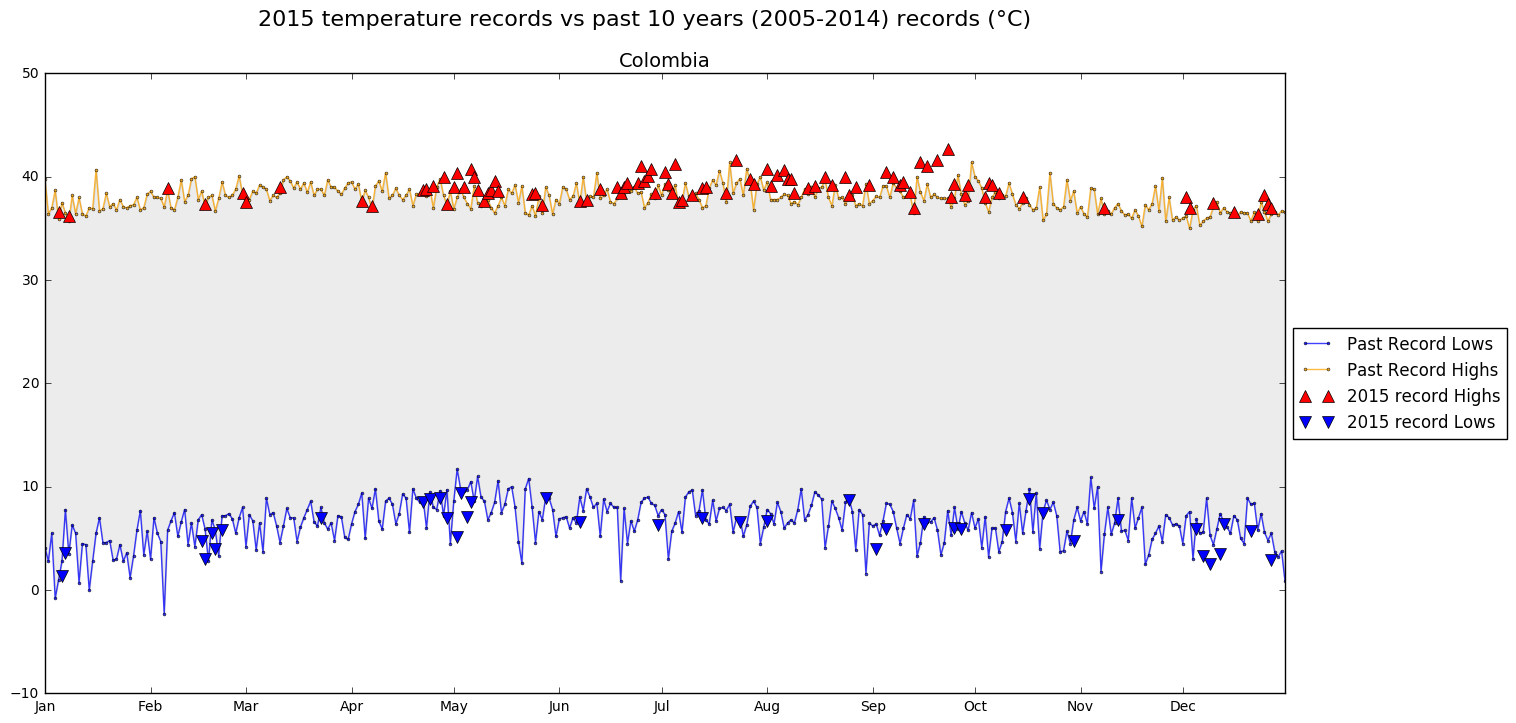

In [26]:
plt.suptitle("2015 temperature records vs past 10 years (2005-2014) records (°C)", fontsize=16)
plt.title("Colombia", fontsize=14)

#Past record temperatures
plt.plot(observation_axis, data_min.as_matrix(), '-o', color='blue', ms=2, alpha=0.75) 
plt.plot(observation_axis, data_max.as_matrix(), '-o', color='orange', ms=2, alpha=0.75) 

#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r^',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'bv', 
         ms=8, alpha=1.0)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(['Past Record Lows', 'Past Record Highs', "2015 record Highs", "2015 record Lows"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

plt.gca().fill_between(observation_axis, data_min, data_max, facecolor='grey', alpha=0.15)